In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 90.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "linear"        #limb darkening model
params.u = [0.3]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.015, 0.015, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

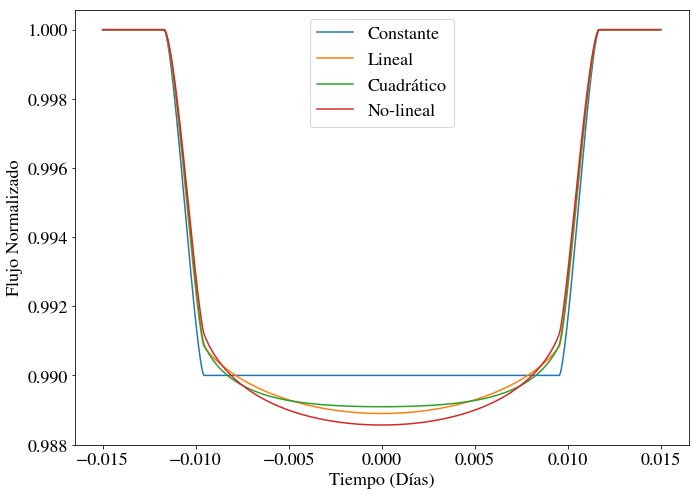

In [2]:
ld_options = ["uniform", "linear", "quadratic", "nonlinear"]
labels = ["Constante", "Lineal", "Cuadrático", "No-lineal"]
ld_coefficients = [[], [0.3], [0.1, 0.3], [0.5, 0.1, 0.1, -0.1]]

plt.figure(figsize=(11,8))

for i in range(4):
        params.limb_dark = ld_options[i]          #specifies the LD profile
        params.u = ld_coefficients[i]             #updates LD coefficients
        m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = labels[i])
plt.xlabel('Tiempo (Días)',size=18)
plt.ylabel('Flujo Normalizado',size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=18)
#plt.savefig('../reports/figures/limbDarkening.png',dpi=300)

In [3]:
plt.legend?

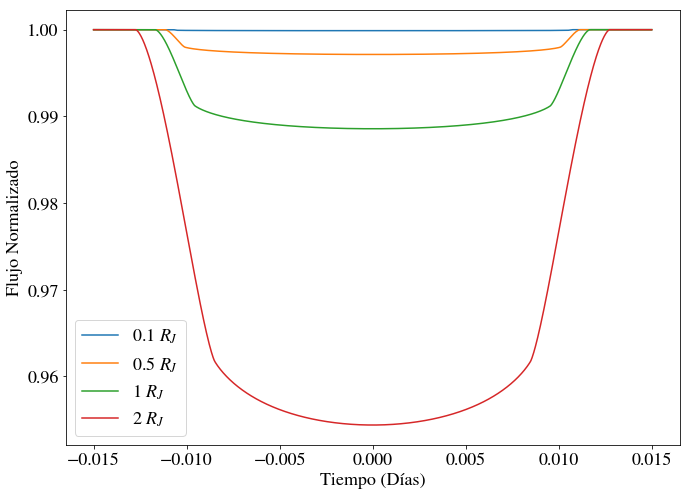

In [4]:
labels = ["0.1 $R_{J}$", "0.5 $R_{J}$", "1 $R_{J}$", "2 $R_{J}$"]
rp_coefficients = [0.01,0.05,0.1,0.2]
plt.figure(figsize=(11,8))
for i in range(4):
    params.rp = rp_coefficients[i]                       #updates LD coefficients
    m = batman.TransitModel(params, t)        #initializes the model
    flux = m.light_curve(params)              #calculates light curve
    plt.plot(t, flux, label = labels[i])
plt.xlabel('Tiempo (Días)',size=18)
plt.ylabel('Flujo Normalizado',size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=18)
plt.savefig('../reports/figures/transitosRadios.png',dpi=300)




In [8]:
flux

In [ ]:
fft_ruido_real=np.fft.fft(ruido_r)
freq = np.fft.fftfreq(size,d=0.05)
fft_lc=np.fft.fft(lc)